In [2]:
# Print Python and Conda versions
!python --version

Python 3.10.9


In [3]:
# Local path to data
DATA_DIR = '/projects/bachelor-thesis/data'
!ls $DATA_DIR

masks  raw_data_32TNS_1C  raw_data_32TNS_2A


In [4]:
# Define and clear temp working directory
TMP_DIR = '/projects/bachelor-thesis/tmp'

In [5]:
# get date out of filename
DATES = !ls "$DATA_DIR/raw_data_32TNS_1C" | cut -c 12-26 | uniq

In [6]:
# Here you can choose the date of the Sentinel-2 image you want to process
DATE = "20210710T101559"

# Remove date from the dates list
DATES.remove(DATE)

# add back DATE as first element
DATES.insert(0, DATE)

In [7]:
!rm -rf $TMP_DIR
!mkdir -p $TMP_DIR

# unzip all the data
for date in DATES:
    !unzip "$DATA_DIR/raw_data_32TNS_1C/"$(ls "$DATA_DIR/raw_data_32TNS_1C" | grep $date) -d $TMP_DIR
    !unzip "$DATA_DIR/raw_data_32TNS_2A/"$(ls "$DATA_DIR/raw_data_32TNS_2A" | grep $date) -d $TMP_DIR

Archive:  /projects/bachelor-thesis/data/raw_data_32TNS_1C/S2B_MSIL1C_20210710T101559_N0301_R065_T32TNS_20210710T122740.zip
 extracting: /projects/bachelor-thesis/tmp/S2B_MSIL1C_20210710T101559_N0301_R065_T32TNS_20210710T122740.SAFE/MTD_MSIL1C.xml  
 extracting: /projects/bachelor-thesis/tmp/S2B_MSIL1C_20210710T101559_N0301_R065_T32TNS_20210710T122740.SAFE/INSPIRE.xml  
 extracting: /projects/bachelor-thesis/tmp/S2B_MSIL1C_20210710T101559_N0301_R065_T32TNS_20210710T122740.SAFE/manifest.safe  
   creating: /projects/bachelor-thesis/tmp/S2B_MSIL1C_20210710T101559_N0301_R065_T32TNS_20210710T122740.SAFE/AUX_DATA/
 extracting: /projects/bachelor-thesis/tmp/S2B_MSIL1C_20210710T101559_N0301_R065_T32TNS_20210710T122740.SAFE/GRANULE/L1C_T32TNS_A022685_20210710T102312/MTD_TL.xml  
 extracting: /projects/bachelor-thesis/tmp/S2B_MSIL1C_20210710T101559_N0301_R065_T32TNS_20210710T122740.SAFE/GRANULE/L1C_T32TNS_A022685_20210710T102312/IMG_DATA/T32TNS_20210710T101559_B03.jp2  
 extracting: /projects/b

In [9]:
import rasterio

bands_collection = []

description = ["Coastal aerosol", "Blue", "Green", "Red", "Vegetation Red Edge 1", "Vegetation Red Edge 2",
               "Vegetation Red Edge 3", "NIR", "Vegetation Red Edge 4", "Water vapour", "SWIR - Cirrus",
               "SWIR 1", "SWIR 2", "True Color Image"]

MSK_CLDPRB_20m = "MSK_CLDPRB_20m.jp2"
MSK_CLDPRB_60m = "MSK_CLDPRB_60m.jp2"
MSK_SNWPRB_20m = "MSK_SNWPRB_20m.jp2"
MSK_SNWPRB_60m = "MSK_SNWPRB_60m.jp2"

for date in DATES:

    # Search for a folder starting with "S2B_MSIL1C_$DATE"
    FOLDER = !ls $TMP_DIR | grep "S2B_MSIL1C_$date"
    FOLDER = FOLDER[0]

    BASE_PATH = f"{TMP_DIR}/{FOLDER}/GRANULE/"

    # list all subfolders of the base path
    SUBFOLDER = !ls $BASE_PATH
    BASE_PATH += '/' + SUBFOLDER[0] + '/IMG_DATA'

    B01 = f"T32TNS_{date}_B01.jp2"
    B02 = f"T32TNS_{date}_B02.jp2"
    B03 = f"T32TNS_{date}_B03.jp2"
    B04 = f"T32TNS_{date}_B04.jp2"
    B05 = f"T32TNS_{date}_B05.jp2"
    B06 = f"T32TNS_{date}_B06.jp2"
    B07 = f"T32TNS_{date}_B07.jp2"
    B08 = f"T32TNS_{date}_B08.jp2"
    B8A = f"T32TNS_{date}_B8A.jp2"
    B09 = f"T32TNS_{date}_B09.jp2"
    B10 = f"T32TNS_{date}_B10.jp2"
    B11 = f"T32TNS_{date}_B11.jp2"
    B12 = f"T32TNS_{date}_B12.jp2"
    TCI = f"T32TNS_{date}_TCI.jp2"

    bands_files = [B01, B02, B03, B04, B05, B06, B07, B08, B8A, B09, B10, B11, B12, TCI]
    bands_files = [f"{BASE_PATH}/{band}" for band in bands_files]

    # Open all the bands
    bands = [rasterio.open(band) for band in bands_files]

    # add description to bands
    for i, band in enumerate(bands):
        band.description = description[i]
        bands[i] = band

    band_B01 = bands[0]
    band_B02 = bands[1]
    band_B03 = bands[2]
    band_B04 = bands[3]
    band_B05 = bands[4]
    band_B06 = bands[5]
    band_B07 = bands[6]
    band_B08 = bands[7]
    band_B8A = bands[8]
    band_B09 = bands[9]
    band_B10 = bands[10]
    band_B11 = bands[11]
    band_B12 = bands[12]
    band_TCI = bands[13]

    # Search for a folder starting with "S2B_MSIL1C_$DATE"
    FOLDER = !ls $TMP_DIR | grep "S2B_MSIL2A_$date"
    FOLDER = FOLDER[0]

    BASE_PATH = f"{TMP_DIR}/{FOLDER}/GRANULE/"

    # list all subfolders of the base path
    SUBFOLDER = !ls $BASE_PATH
    BASE_PATH += '/' + SUBFOLDER[0] + '/QI_DATA'

    mask_cldprb_20m = rasterio.open(f"{BASE_PATH}/{MSK_CLDPRB_20m}")
    mask_cldprb_60m = rasterio.open(f"{BASE_PATH}/{MSK_CLDPRB_60m}")
    mask_snwprb_20m = rasterio.open(f"{BASE_PATH}/{MSK_SNWPRB_20m}")
    mask_snwprb_60m = rasterio.open(f"{BASE_PATH}/{MSK_SNWPRB_60m}")

    bands_collection.append((
        date,
        bands,
        mask_cldprb_20m,
        mask_cldprb_60m,
        mask_snwprb_20m,
        mask_snwprb_60m
    ))

In [10]:
# Center of the image
(lon, lat) = (540059, 5111305)

BASE_RES = 10.0
IMG_SIZE = 1024

In [11]:
def calc_mean_diff(band, bands):
    sum = None
    for b in bands:
        sum = b[0] if sum is None else sum + b[0]

    mean = sum / len(bands)
    return band[0] - mean


In [12]:
# Compare two images of the same location captured at different times

from rasterio.windows import Window
from rasterio.plot import show

import matplotlib.pyplot as plt

bands_of_interest = [1, 2, 3]

# Open TCI of day 0
tci = bands_collection[0][1][13]
py, px = tci.index(lon, lat)
window = Window(px - IMG_SIZE // 2, py - IMG_SIZE // 2, IMG_SIZE, IMG_SIZE)
tci = tci.read(window=window)

overall_mean_diff = None

# Plot bands of interest
for i, band_index in enumerate(bands_of_interest):
    band_buff = bands_collection[0][1][band_index]
    band = band_buff.read(window=window)

    bands = [b_at_day[1][band_index].read(window=window) for b_at_day in bands_collection[1:]]
    mean_diff = calc_mean_diff(band, bands)
    overall_mean_diff = mean_diff if overall_mean_diff is None else overall_mean_diff + mean_diff

# Plot the mean diff of all bands
overall_mean_diff = overall_mean_diff / len(bands_of_interest)
overall_mean_range = overall_mean_diff.max() - overall_mean_diff.min()
overall_mean_diff = (overall_mean_diff - overall_mean_diff.min()) / overall_mean_range

This approach is also discussed here: https://medium.com/sentinel-hub/on-cloud-detection-with-multi-temporal-data-f64f9b8d59e5

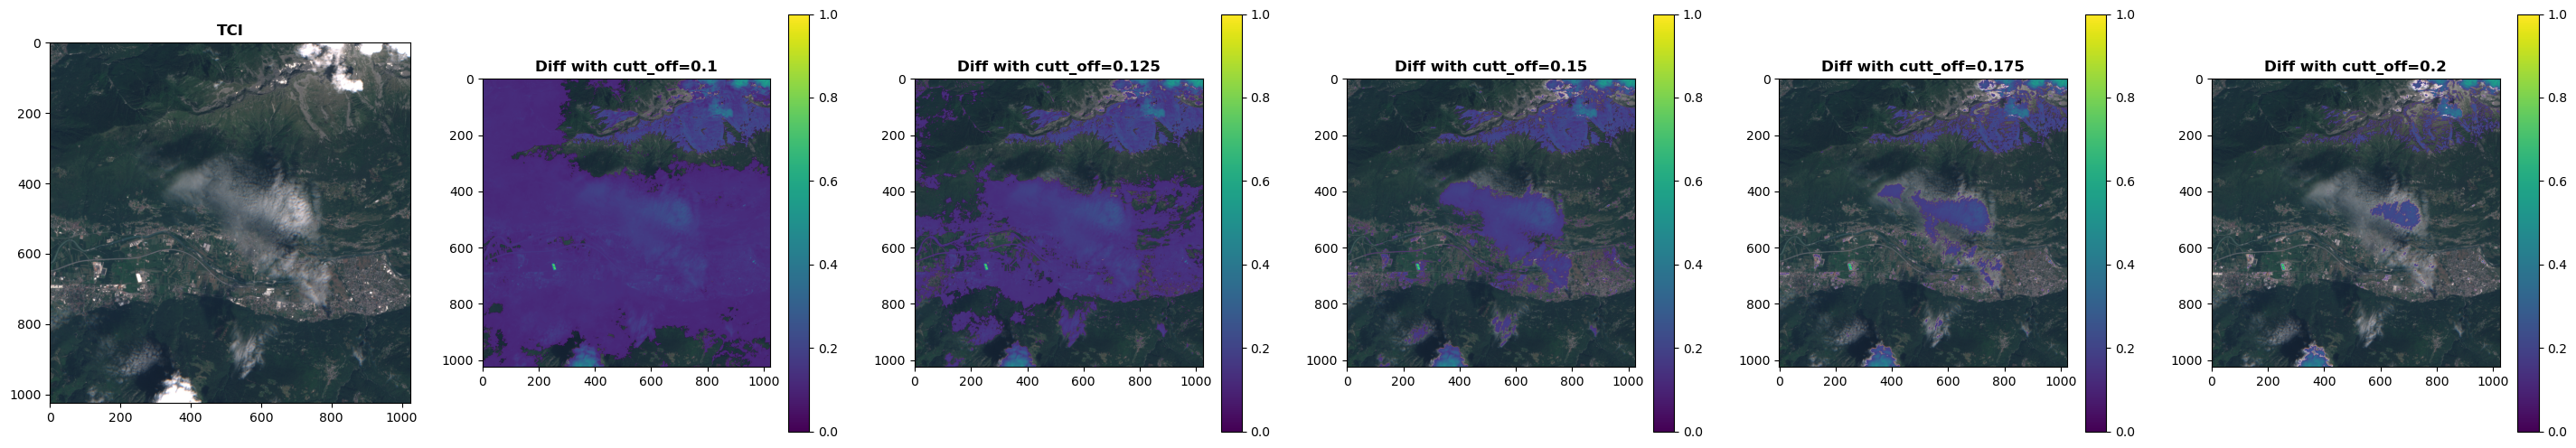

In [14]:
import numpy as np

overall_mean_diff_cutted = overall_mean_diff.copy()

min = 0.1
max = 0.2

# get 5 eqi-distant values between min and max
cutt_offs = np.linspace(min, max, 5)

# Create Plot
fig, ax = plt.subplots(1,6, figsize=(36, 6))
show(tci, ax=ax[0], title=f"TCI")

for i, cut in enumerate(cutt_offs):

    i += 1

    # cutt of low values
    overall_mean_diff_cutted[overall_mean_diff_cutted < cut] = 0


    alpha_channel = overall_mean_diff_cutted.copy()
    alpha_channel[alpha_channel > 0] = 1

    show(tci, ax=ax[i])
    show(overall_mean_diff_cutted, ax=ax[i], title=f"Diff with cutt_off={round(cut, 3)}", alpha=alpha_channel)
    fig.colorbar(ax[i].get_images()[1], ax=ax[i])